[Reference](https://towardsdatascience.com/baby-steps-towards-data-science-support-vector-regression-in-python-d6f5231f3be2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('https://gist.githubusercontent.com/tharunpeddisetty/3fe7c29e9e56c3e17eb41a376e666083/raw/2fc31b364638c9de15cb440083dce26d401474eb/Position_Salaries.csv') 

X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
#Feature Scaling. Required for SVR. Since there’s no concept of coefficients
print(y) 
#we need to reshape y because standard scaler class expects a 2D array
y=y.reshape(len(y),1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X= sc_X.fit_transform(X)
# create a new sc object because the first one calcualtes the mean and standard deviation of X. We need different values of mean and standard deviation for Y
y= sc_y.fit_transform(y)
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [4]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

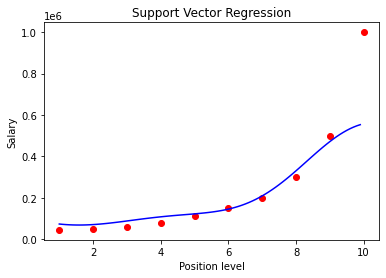

In [5]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Support Vector Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [6]:
print(sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))))

[170370.0204065]
